In [3]:
import pandas as pd
from pathlib import Path

In [4]:
path = "/home/criuser/LPI Courses/Data & IA/Final Project/store-sales-time-series-forecasting/"

In [5]:
train_df = pd.read_csv(path+'train.csv',
                       header=0,
                       parse_dates=['date'],
                       infer_datetime_format=True
                      )

test_df = pd.read_csv(path+'test.csv',
                      header=0,
                      parse_dates=['date'],
                      infer_datetime_format=True
                     )
stores_df = pd.read_csv(path+'stores.csv',
                        header=0,
                        #parse_dates=['date'],
                        #infer_datetime_format=True
                       )
holiday_df = pd.read_csv(path+'holidays_events.csv',
                         header=0,
                         parse_dates=['date'],
                         infer_datetime_format=True
                        )
oil_df = pd.read_csv(path+'oil.csv',
                     header=0,
                     parse_dates=['date'],
                     infer_datetime_format=True
                    )
transaction_df = pd.read_csv(path+'transactions.csv',
                     header=0,
                     parse_dates=['date'],
                     infer_datetime_format=True
                    )

In [6]:
train_df.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [7]:
print("Shape of training set: ",train_df.shape)

Shape of training set:  (3000888, 6)


In [8]:
test_df.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [9]:
# Merge holiday col

train_df['holiday'] = [0] * train_df.shape[0]
test_df['holiday'] = [0] * test_df.shape[0]

holiday_type = { "National": 1, "Regional": 2, "Local": 3}

for idx, row in holiday_df.iterrows():
    
    if row['type'] in ['Event', 'Transfer', 'Bridge', 'Additional'] or (row['type'] == 'Holiday' and row['transferred'] == False):
        train_df.loc[train_df['date'] == row['date'], 'holiday'] = holiday_type[row['locale']]
        test_df.loc[train_df['date'] == row['date'], 'holiday'] = holiday_type[row['locale']]
    else:
        train_df.loc[train_df['date'] == row['date'], 'holiday'] = 0 # no holiday
        test_df.loc[train_df['date'] == row['date'], 'holiday'] = 0 # no holiday

print("Shape of training set: ",train_df.shape)

Shape of training set:  (3000888, 7)


In [10]:
train_df[['date','holiday', 'sales']].head()

,date,holiday,sales
0,2013-01-01,1,0.0
1,2013-01-01,1,0.0
2,2013-01-01,1,0.0
3,2013-01-01,1,0.0
4,2013-01-01,1,0.0


In [11]:
test_df[['date','holiday']].head()

,date,holiday
0,2017-08-16,1
1,2017-08-16,1
2,2017-08-16,1
3,2017-08-16,1
4,2017-08-16,1


import math

oil_df.loc[0, 'dcoilwtico'] = oil_df.loc[1, 'dcoilwtico']
prev_row_value = None
for idx, row in oil_df.iterrows():
    print(row['dcoilwtico'])
    if math.isnan(row['dcoilwtico']):
        oil_df.loc[idx, 'dcoilwtico'] = prev_row_value
    else:
        prev_row_value = row['dcoilwtico']


In [12]:
train_df = pd.merge(train_df, oil_df, how='left', left_on=['date'], right_on = ['date'])
train_df.rename(columns = {'dcoilwtico':'oil_price'}, inplace = True)
train_df['oil_price'] = train_df['oil_price'].fillna(method="ffill")

# test dataset
test_df = pd.merge(test_df, oil_df, how='left', left_on=['date'], right_on = ['date'])
test_df.rename(columns = {'dcoilwtico':'oil_price'}, inplace = True)
test_df['oil_price'] = test_df['oil_price'].fillna(method="ffill")

print("Shape of training set: ",train_df.shape)

Shape of training set:  (3000888, 8)


In [13]:
train_df[['date', 'oil_price', 'sales']].head()

,date,oil_price,sales
0,2013-01-01,NaN,0.0
1,2013-01-01,NaN,0.0
2,2013-01-01,NaN,0.0
3,2013-01-01,NaN,0.0
4,2013-01-01,NaN,0.0


In [14]:
# Merge stores cols

train_df = pd.merge(train_df, stores_df, how='left', left_on=['store_nbr'], right_on = ['store_nbr'])
test_df = pd.merge(test_df, stores_df, how='left', left_on=['store_nbr'], right_on = ['store_nbr'])

print("Shape of training set: ",train_df.shape)

Shape of training set:  (3000888, 12)


In [15]:
train_df[['store_nbr', 'city', 'state', 'type', 'cluster']].head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,1,Quito,Pichincha,D,13
2,1,Quito,Pichincha,D,13
3,1,Quito,Pichincha,D,13
4,1,Quito,Pichincha,D,13


In [ ]:
# Merge stores cols

train_df = pd.merge(train_df, transaction_df, how='left', left_on=['date','store_nbr'], right_on = ['date','store_nbr'])
test_df = pd.merge(test_df, transaction_df, how='left', left_on=['date','store_nbr'], right_on = ['date','store_nbr'])

print("Shape of training set: ",train_df.shape)

In [ ]:
train_df.head()

## Percentage of missing value for each column

In [15]:
100*train_df.isna().sum()/train_df.shape[0]

id              0.000000
date            0.000000
store_nbr       0.000000
family          0.000000
sales           0.000000
onpromotion     0.000000
holiday         0.000000
oil_price       0.059382
city            0.000000
state           0.000000
type            0.000000
cluster         0.000000
transactions    8.190376
dtype: float64

In [16]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib.dates as mdates
import numpy as np

def plot_dfs(df1, df2, col, title=None, xlabel=None, ylabel=None):
    '''
    df1: original dataframe without missing data
    df2: dataframe with missing data
    col: column name that contains missing data
    '''    
    df_missing = df2.rename(columns={col: 'missing'})
    
    columns = df_missing.loc[:, 'missing':].columns.tolist()
    subplots_size = len(columns)
    
    # subplots_size = df2.shape[1]
    fig, ax = plt.subplots(2, 1, sharex=True)
    plt.subplots_adjust(hspace=0.25)
    fig.suptitle = title 
    
    df1[['date',col]].plot(ax=ax[0], x="date" ,figsize=(10, 16))
    ax[0].set_title('Original Dataset')
    ax[0].set_xlabel(xlabel)
    ax[0].set_ylabel(ylabel)
    
    df2[['date',col]].plot(ax=ax[1], x="date" ,figsize=(10, 16))
    ax[1].set_title('Imputed Dataset')
    ax[1].set_xlabel(xlabel)
    ax[1].set_ylabel(ylabel)
    
    plt.show()

In [17]:
train_df_ffill_imput = train_df.fillna(method="ffill")
train_df_bfill_imput = train_df.fillna(method="bfill")

In [18]:
def rmse_score(df1, df2, col=None):
    '''
    df1: original dataframe without missing data
    df2: dataframe with missing data
    col: column name that contains missing data

    returns: a list of scores
    '''
    df_missing = df2.rename(columns={col: 'missing'})
    columns = df_missing.loc[:, 'missing':].columns.tolist()
    scores = []
    for comp_col in columns[1:]:
        rmse = np.sqrt(np.mean((df1[col] - df_missing[comp_col])**2))
        scores.append(rmse)
        print(f'RMSE for {comp_col}: {rmse}')
    return scores

In [19]:
np.sqrt(np.mean(np.abs(train_df.oil_price-train_df_ffill_imput.oil_price)))

0.0

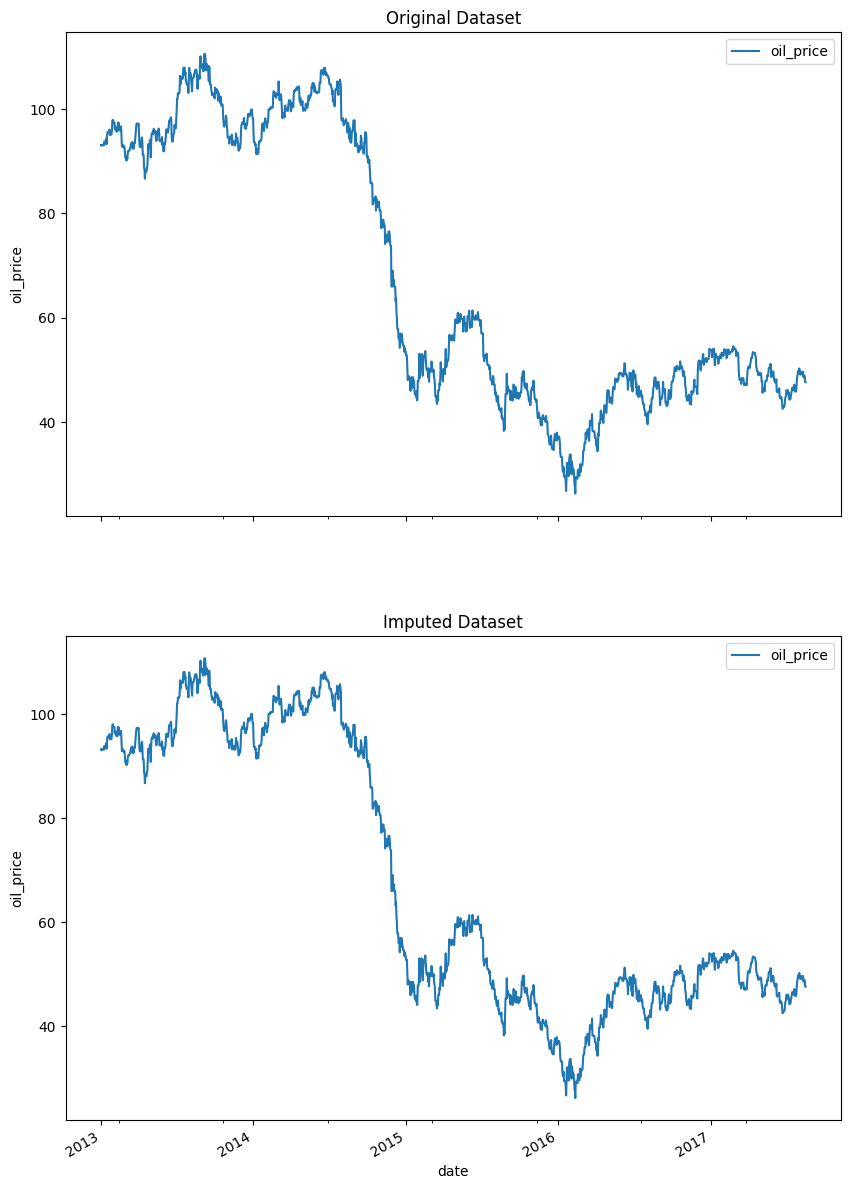

In [20]:
plot_dfs(train_df,train_df_ffill_imput,col="oil_price",xlabel="date",ylabel="oil_price")

In [21]:
train_df.family.unique()

array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
       'SEAFOOD'], dtype=object)

In [22]:
train_df[train_df["store_nbr"]==1][train_df["family"]=='AUTOMOTIVE'].head()

/tmp/ipykernel_5298/1290841144.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train_df[train_df["store_nbr"]==1][train_df["family"]=='AUTOMOTIVE'].head()


,id,date,store_nbr,family,sales,onpromotion,holiday,oil_price,city,state,type,cluster,transactions
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,1,NaN,Quito,Pichincha,D,13,NaN
1782,1782,2013-01-02,1,AUTOMOTIVE,2.0,0,0,93.14,Quito,Pichincha,D,13,2111.0
3564,3564,2013-01-03,1,AUTOMOTIVE,3.0,0,0,92.97,Quito,Pichincha,D,13,1833.0
5346,5346,2013-01-04,1,AUTOMOTIVE,3.0,0,0,93.12,Quito,Pichincha,D,13,1863.0
7128,7128,2013-01-05,1,AUTOMOTIVE,5.0,0,0,93.12,Quito,Pichincha,D,13,1509.0


/tmp/ipykernel_5298/1312308513.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = train_df[train_df.date.between("2013-01-01","2013-05-30")][train_df["store_nbr"]==1][train_df["family"]=='AUTOMOTIVE']
/tmp/ipykernel_5298/1312308513.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = train_df_bfill_imput[train_df_bfill_imput.date.between("2013-01-01","2013-05-30")][train_df_bfill_imput["store_nbr"]==1][train_df["family"]=='AUTOMOTIVE']


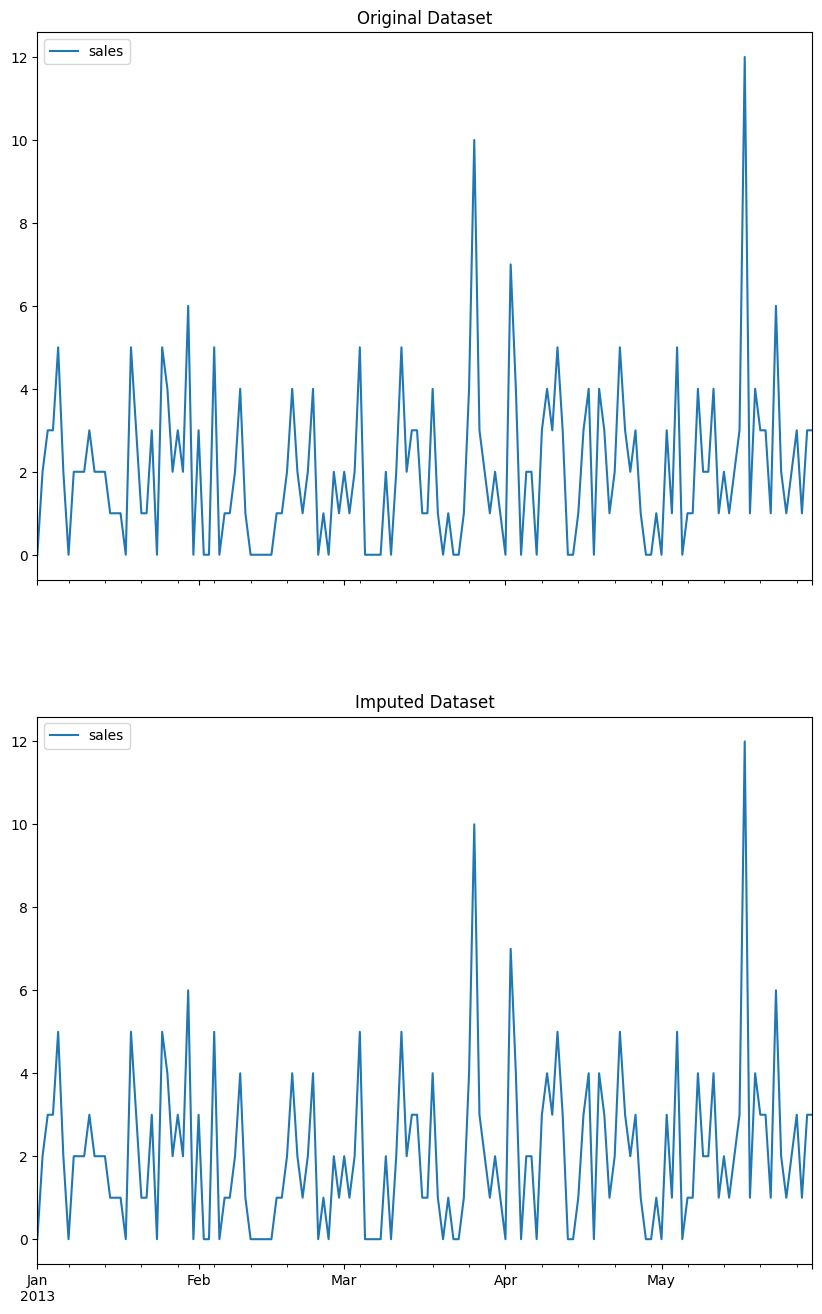

In [23]:
df1 = train_df[train_df.date.between("2013-01-01","2013-05-30")][train_df["store_nbr"]==1][train_df["family"]=='AUTOMOTIVE']

df2 = train_df_bfill_imput[train_df_bfill_imput.date.between("2013-01-01","2013-05-30")][train_df_bfill_imput["store_nbr"]==1][train_df["family"]=='AUTOMOTIVE']


plot_dfs(df1,df2,col="sales")

In [24]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000888 entries, 0 to 3000887
Data columns (total 13 columns):
 #   Column        Dtype         
---  ------        -----         
 0   id            int64         
 1   date          datetime64[ns]
 2   store_nbr     int64         
 3   family        object        
 4   sales         float64       
 5   onpromotion   int64         
 6   holiday       int64         
 7   oil_price     float64       
 8   city          object        
 9   state         object        
 10  type          object        
 11  cluster       int64         
 12  transactions  float64       
dtypes: datetime64[ns](1), float64(3), int64(5), object(4)
memory usage: 385.0+ MB


In [25]:
train_df=train_df.replace(np.NaN,np.nan)

In [26]:
missing_values = train_df[train_df["transactions"].isnull()]

missing_values.shape

(245784, 13)

In [27]:
missing_values[missing_values["sales"]==0].shape[0]/missing_values.shape[0]

0.9867851446798815

In [28]:
missing_values[missing_values["sales"]!=0]

,id,date,store_nbr,family,sales,onpromotion,holiday,oil_price,city,state,type,cluster,transactions
301191,301191,2013-06-19,10,AUTOMOTIVE,3.000,0,0,98.24,Quito,Pichincha,C,15,NaN
301194,301194,2013-06-19,10,BEVERAGES,515.000,0,0,98.24,Quito,Pichincha,C,15,NaN
301196,301196,2013-06-19,10,BREAD/BAKERY,94.000,0,0,98.24,Quito,Pichincha,C,15,NaN
301198,301198,2013-06-19,10,CLEANING,695.000,0,0,98.24,Quito,Pichincha,C,15,NaN
301199,301199,2013-06-19,10,DAIRY,43.000,0,0,98.24,Quito,Pichincha,C,15,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2428794,2428794,2016-09-27,7,PLAYERS AND ELECTRONICS,12.000,0,0,44.65,Quito,Pichincha,D,8,NaN
2428795,2428795,2016-09-27,7,POULTRY,674.468,0,0,44.65,Quito,Pichincha,D,8,NaN
2428796,2428796,2016-09-27,7,PREPARED FOODS,172.204,0,0,44.65,Quito,Pichincha,D,8,NaN
2428797,2428797,2016-09-27,7,PRODUCE,5306.265,1,0,44.65,Quito,Pichincha,D,8,NaN


In [29]:
train_df["store_nbr"].nunique()

54

In [30]:
test_df["family"].nunique()

33

In [31]:
def plot_time_series(df,col,window_min,window_max):
    
    df = df[df.date.between(window_min,window_max)][["date",col]].groupby(by="date").sum()
    
    df.plot(y=col,figsize=(14,8))
    
    plt.show()

/home/criuser/.virtualenvs/PythonWorkshop/lib/python3.9/site-packages/pandas/core/arraylike.py:52: UserWarning: Parsing '31-12-2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return self._cmp_method(other, operator.le)


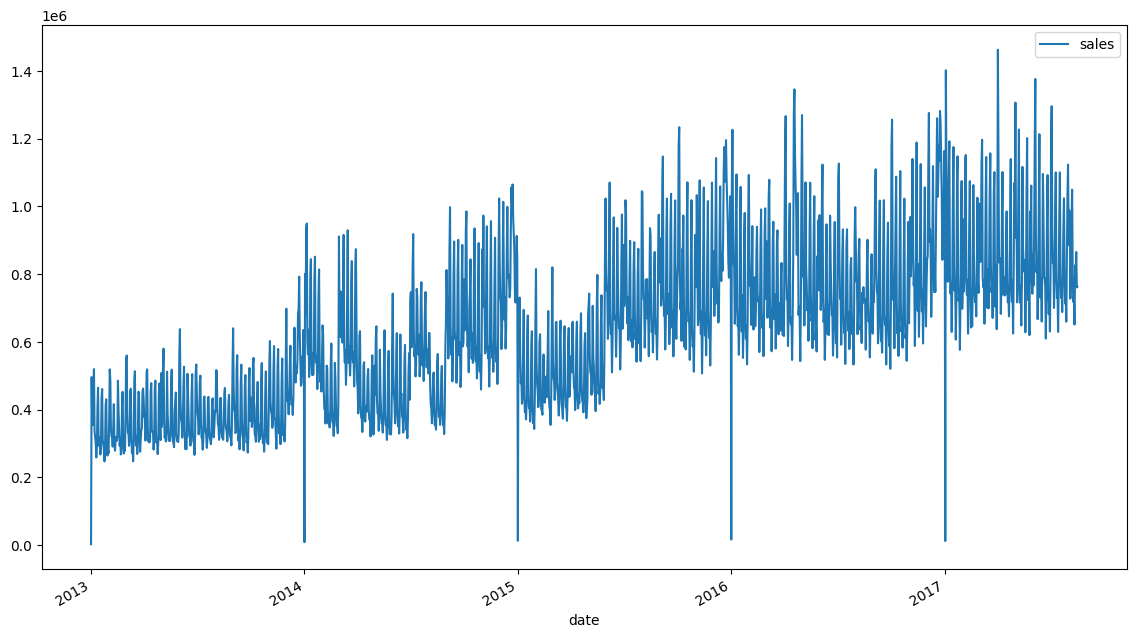

In [32]:
plot_time_series(train_df,col="sales",window_min="01-01-2013",window_max="31-12-2017")

/tmp/ipykernel_5298/3567471438.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train_df[train_df.date.between("2013-01-01","2013-02-28")][train_df["store_nbr"]==1][train_df["family"]=="AUTOMOTIVE"][["date","sales"]].plot(x="date",y="sales")


<AxesSubplot: xlabel='date'>

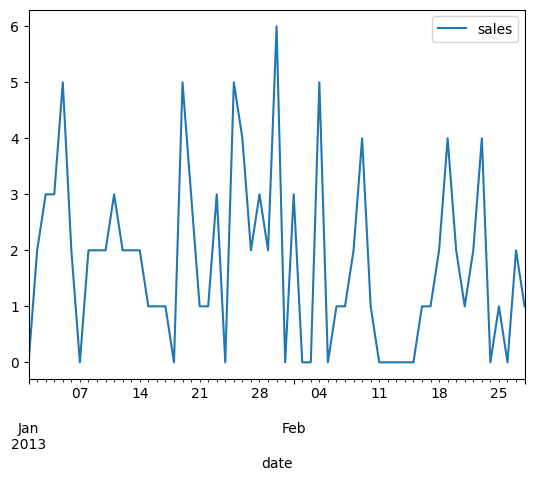

In [33]:
train_df[train_df.date.between("2013-01-01","2013-02-28")][train_df["store_nbr"]==1][train_df["family"]=="AUTOMOTIVE"][["date","sales"]].plot(x="date",y="sales")

import math

for idx,row in train_df[["sales","oil_price","transactions"]].iterrows():  

    
    if math.isnan(row["oil_price"]) and row["sales"] == 0:
        
        train_df.loc[idx,"oil_price"] = 0
        
    if math.isnan(row["transactions"]) and row["sales"] == 0:
        
        train_df.loc[idx,"transactions"] = 0
    
for idx,row in test_df[["sales","oil_price","transactions"]].iterrows():  

    
    if math.isnan(row["oil_price"]) and row["sales"] == 0:
        
        test_df.loc[idx,"oil_price"] = 0
        
    if math.isnan(row["transactions"]) and row["sales"] == 0:
        
        test_df.loc[idx,"transactions"] = 0   

In [34]:
train_df=train_df.fillna(0) # fillna par zero pour oil price et la transactions
test_df=test_df.fillna(0)

In [35]:
train_df.isna().sum()

id              0
date            0
store_nbr       0
family          0
sales           0
onpromotion     0
holiday         0
oil_price       0
city            0
state           0
type            0
cluster         0
transactions    0
dtype: int64

In [36]:
train_df[train_df["oil_price"].isna()] # Subsequent the oil_price will be considerd as zero for holidays

,id,date,store_nbr,family,sales,onpromotion,holiday,oil_price,city,state,type,cluster,transactions


In [37]:
train_df_ffill_imput = train_df.fillna(method="ffill")
train_df_bfill_imput = train_df.fillna(method="bfill")

In [38]:
train_df_bfill_imput[train_df.transactions.isna()]

,id,date,store_nbr,family,sales,onpromotion,holiday,oil_price,city,state,type,cluster,transactions


In [39]:
categorical_vars = ["city", "state", "type", "family", "cluster",'holiday']

train_df[categorical_vars] = train_df[categorical_vars].astype('category')
test_df[categorical_vars] = test_df[categorical_vars].astype('category')

In [40]:
train_df_encoded = pd.get_dummies(train_df)
test_df_encoded = pd.get_dummies(test_df)

In [41]:
train_df_encoded.head()

,id,date,store_nbr,sales,onpromotion,oil_price,transactions,family_AUTOMOTIVE,family_BABY CARE,family_BEAUTY,...,cluster_8,cluster_9,cluster_10,cluster_11,cluster_12,cluster_13,cluster_14,cluster_15,cluster_16,cluster_17
0,0,2013-01-01,1,0.0,0,0.0,0.0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,2013-01-01,1,0.0,0,0.0,0.0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,2,2013-01-01,1,0.0,0,0.0,0.0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,3,2013-01-01,1,0.0,0,0.0,0.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,4,2013-01-01,1,0.0,0,0.0,0.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [42]:
test_df_encoded.head()

,id,date,store_nbr,onpromotion,oil_price,transactions,family_AUTOMOTIVE,family_BABY CARE,family_BEAUTY,family_BEVERAGES,...,cluster_8,cluster_9,cluster_10,cluster_11,cluster_12,cluster_13,cluster_14,cluster_15,cluster_16,cluster_17
0,3000888,2017-08-16,1,0,46.8,0.0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,3000889,2017-08-16,1,0,46.8,0.0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,3000890,2017-08-16,1,2,46.8,0.0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,3000891,2017-08-16,1,20,46.8,0.0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,3000892,2017-08-16,1,0,46.8,0.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [43]:
train_df_encoded.shape

(3000888, 104)

In [44]:
train_df_encoded.columns[train_df_encoded.columns.str.startswith("s")]

Index(['store_nbr', 'sales', 'state_Azuay', 'state_Bolivar',
       'state_Chimborazo', 'state_Cotopaxi', 'state_El Oro',
       'state_Esmeraldas', 'state_Guayas', 'state_Imbabura', 'state_Loja',
       'state_Los Rios', 'state_Manabi', 'state_Pastaza', 'state_Pichincha',
       'state_Santa Elena', 'state_Santo Domingo de los Tsachilas',
       'state_Tungurahua'],
      dtype='object')

In [45]:
3000888*0.70

2100621.6

In [46]:
train_set = train_df_encoded.iloc[:500000,:]

valid_set = train_df_encoded.iloc[500000:800000,:]

In [47]:
train_set.to_csv("train_df_processed.csv", index = False)
valid_set.to_csv("valid_df_processed.csv", index = False)